# Seaborn: Easier Visualizations


Setup

In [ ]:
pip install seaborn

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Import data

In [3]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [8]:
crash_df = sns.load_dataset('car_crashes')
crash_df.head()
crash_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total           51 non-null     float64
 1   speeding        51 non-null     float64
 2   alcohol         51 non-null     float64
 3   not_distracted  51 non-null     float64
 4   no_previous     51 non-null     float64
 5   ins_premium     51 non-null     float64
 6   ins_losses      51 non-null     float64
 7   abbrev          51 non-null     object 
dtypes: float64(7), object(1)
memory usage: 3.3+ KB


In [7]:
crash_df.describe()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,15.790196,4.998196,4.886784,13.573176,14.004882,886.957647,134.493137
std,4.122002,2.017747,1.729133,4.508977,3.764672,178.296285,24.835922
min,5.900000,1.792000,1.593000,1.760000,5.900000,641.960000,82.750000
25%,12.750000,3.766500,3.894000,10.478000,11.348000,768.430000,114.645000
50%,15.600000,4.608000,4.554000,13.857000,13.775000,858.970000,136.050000
75%,18.500000,6.439000,5.604000,16.140000,16.755000,1007.945000,151.870000
max,23.900000,9.450000,10.038000,23.661000,21.280000,1301.520000,194.780000


## Distribution Plot

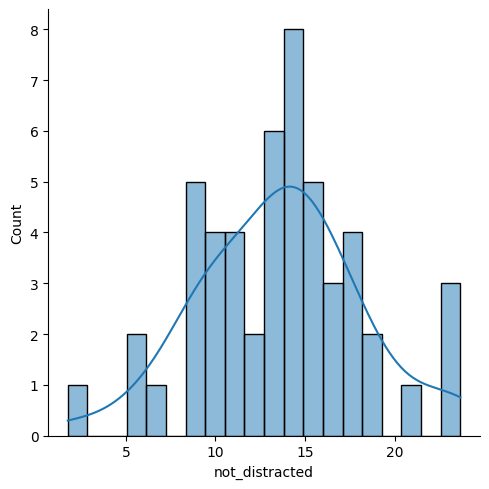

In [21]:
sns.displot(crash_df['not_distracted'], bins=20, kde=True)

## Joint Plot

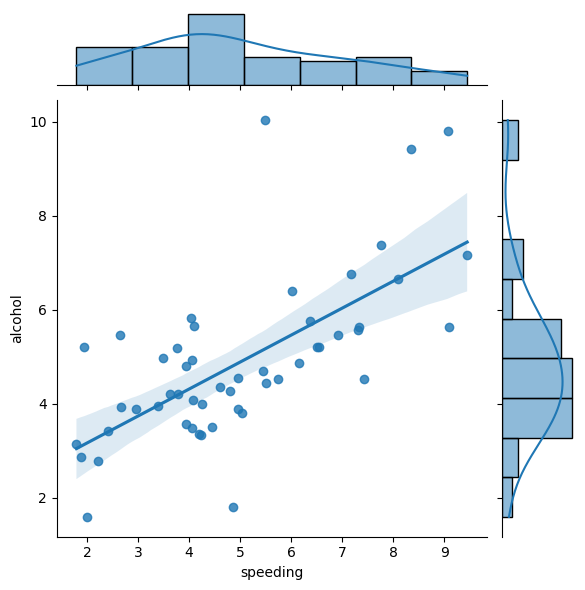

In [23]:
sns.jointplot(x='speeding', y='alcohol', data=crash_df,kind='reg')

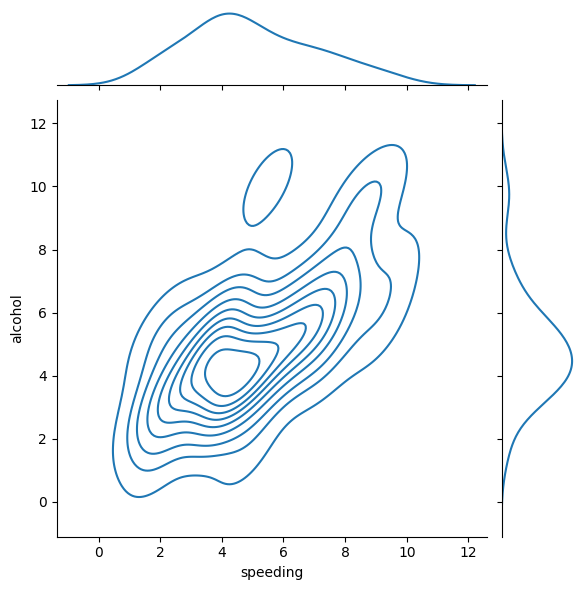

In [24]:
sns.jointplot(x='speeding', y='alcohol', data=crash_df,kind='kde')

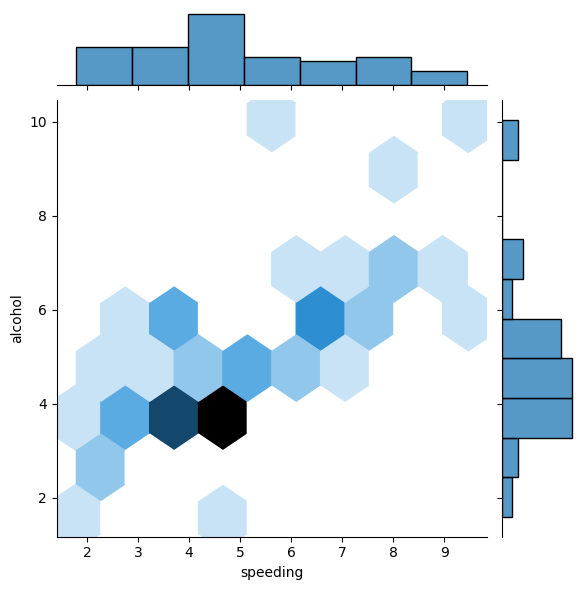

In [25]:
sns.jointplot(x='speeding', y='alcohol', data=crash_df,kind='hex')

## KDE plot

<Axes: xlabel='alcohol', ylabel='Density'>

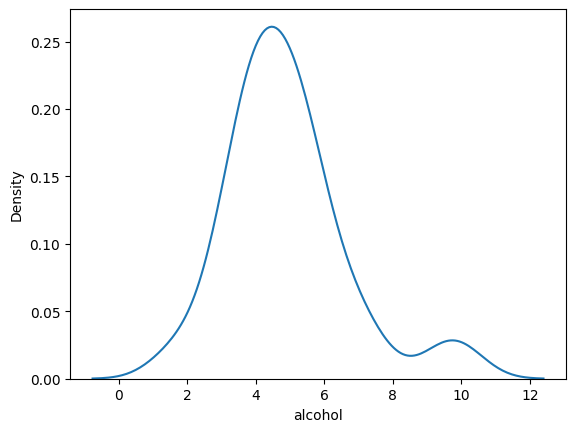

In [27]:
sns.kdeplot(crash_df['alcohol'])

## Pair Plot

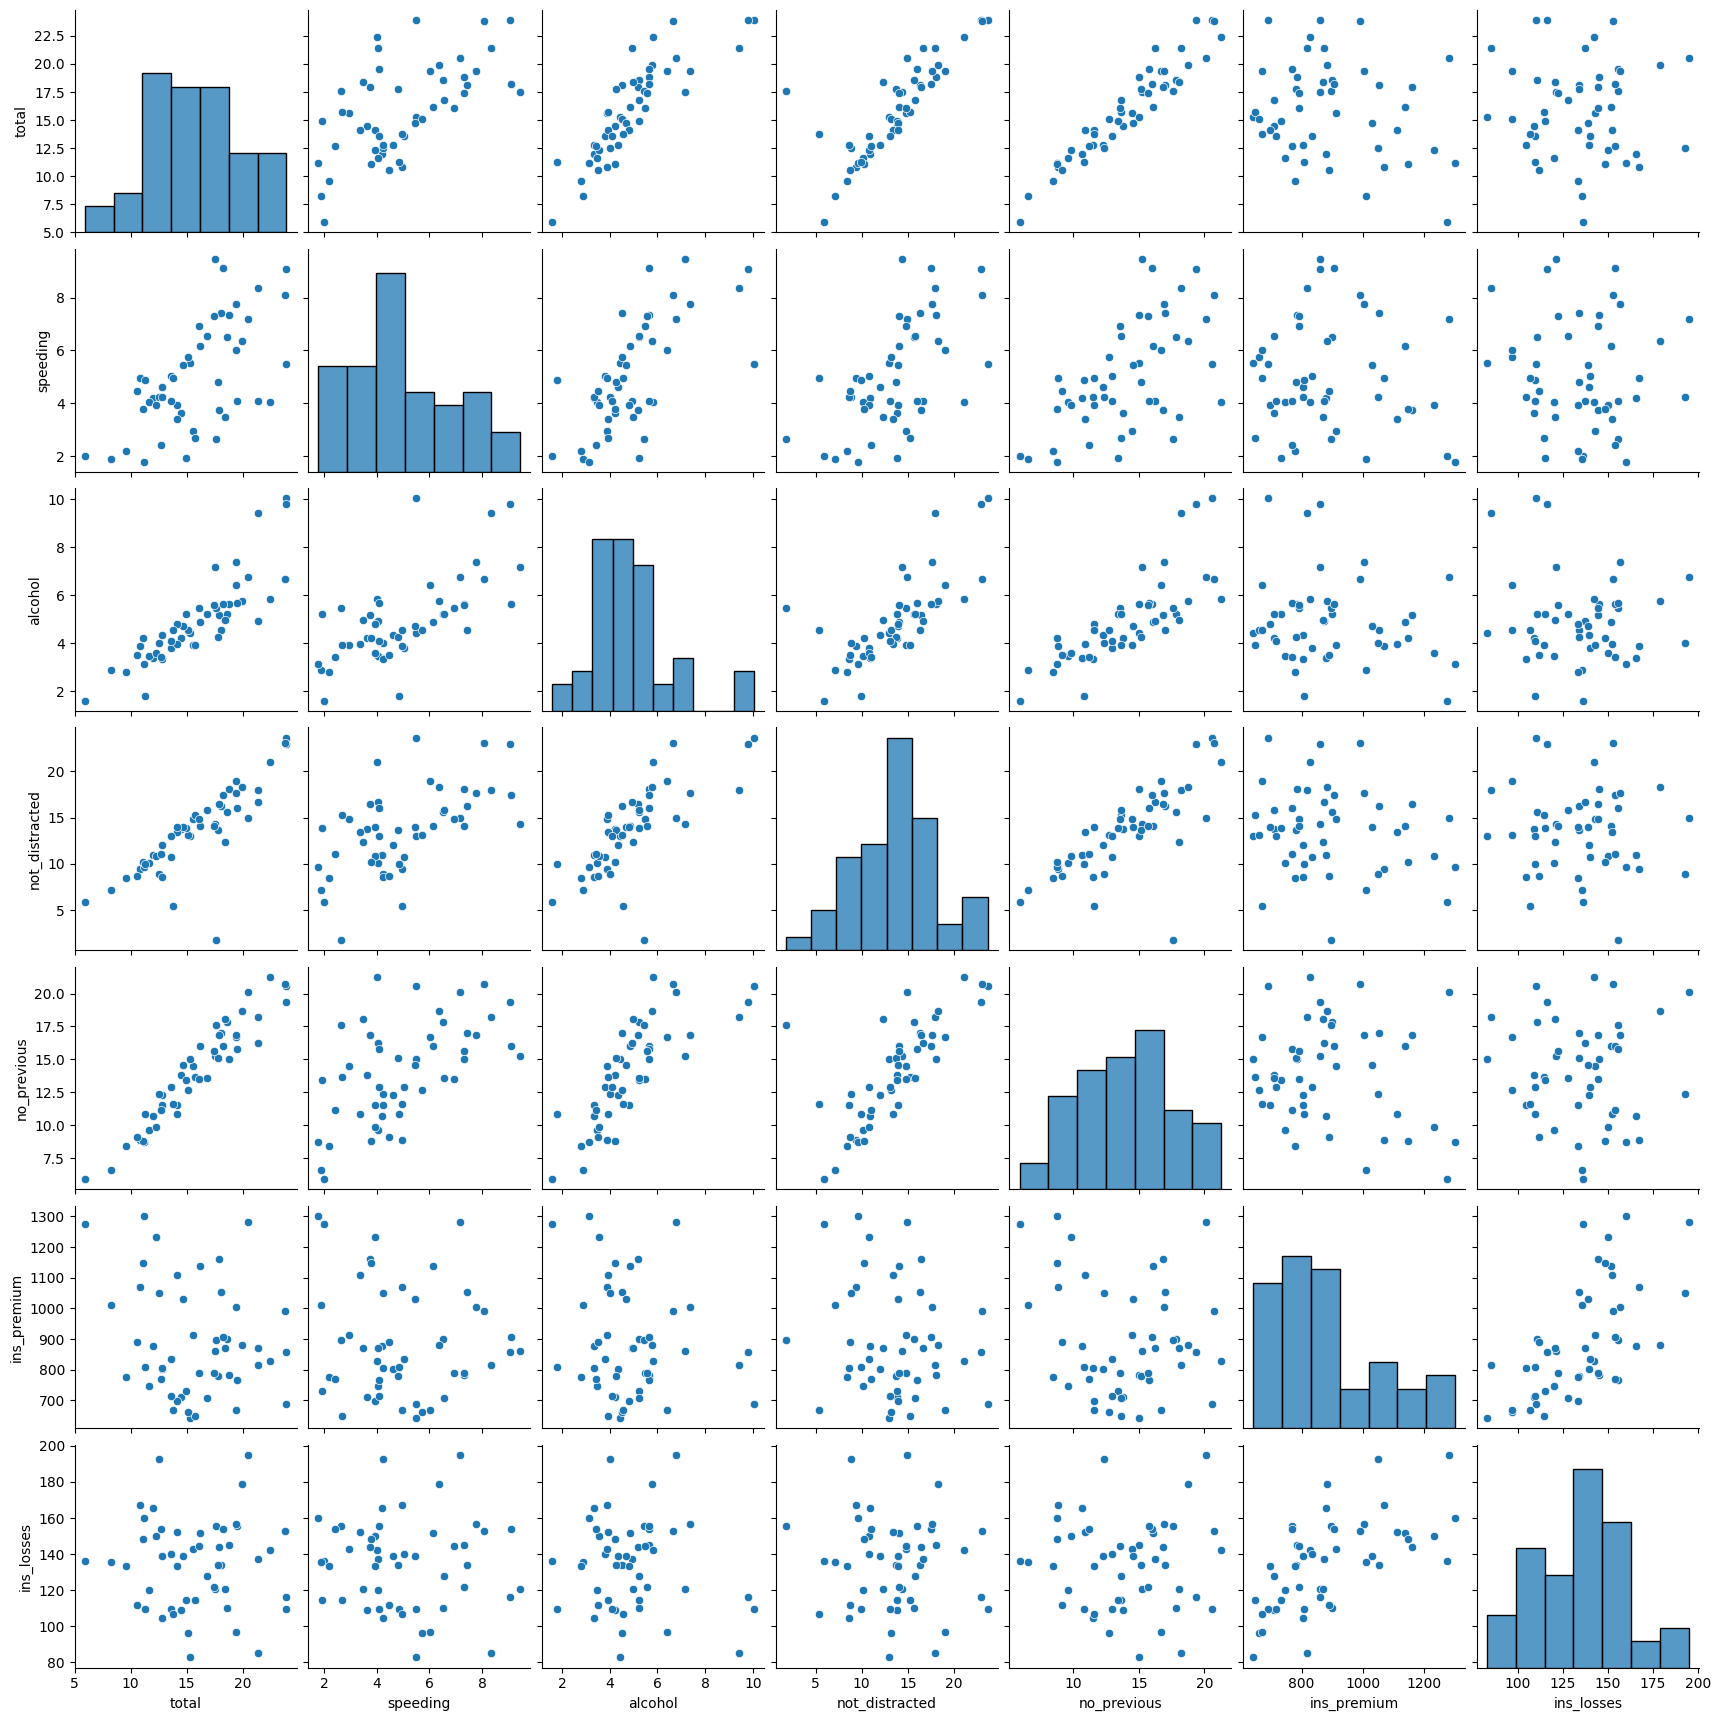

In [28]:
sns.pairplot(crash_df)

In [34]:
tips_df = sns.load_dataset('tips')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


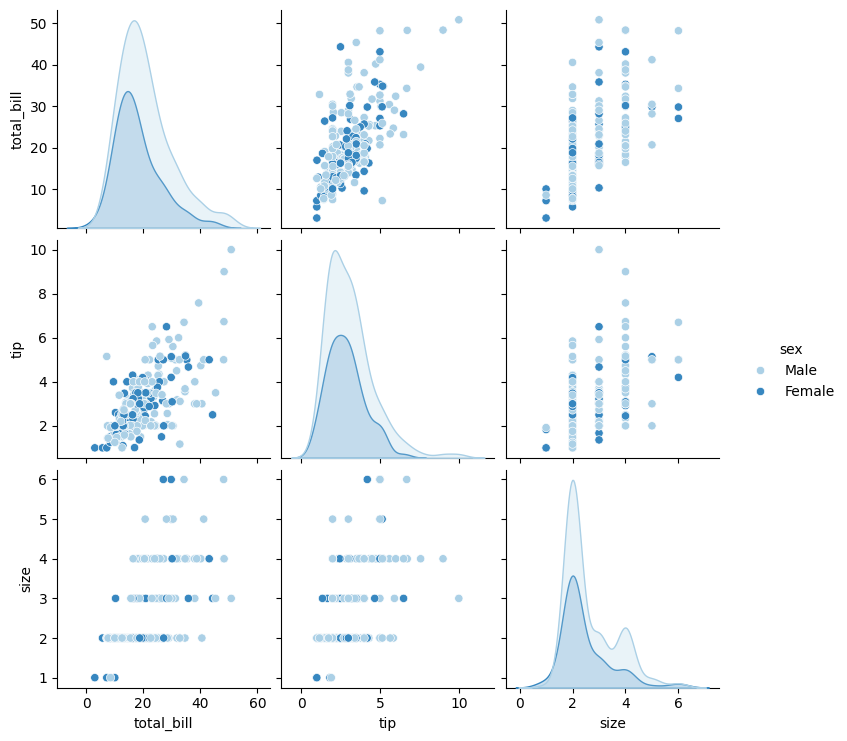

In [30]:
sns.pairplot(tips_df, hue='sex', palette="Blues")

## Categorical Plots

### Bar Plot

<Axes: xlabel='sex', ylabel='total_bill'>

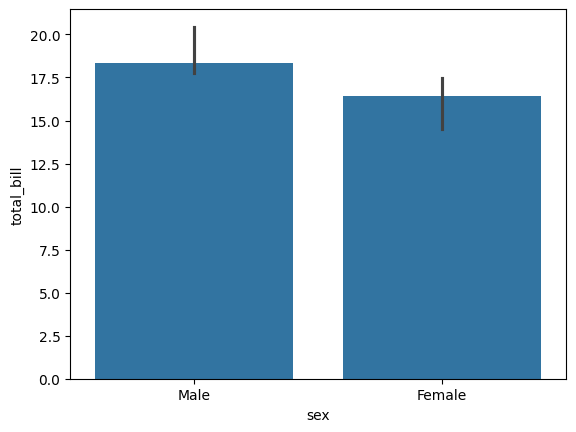

In [34]:
sns.barplot(x='sex', y='total_bill', data=tips_df, estimator=np.median)

### Count Plot

<Axes: xlabel='day', ylabel='count'>

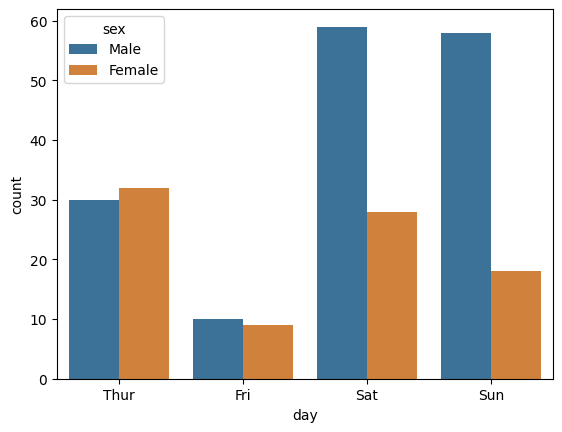

In [81]:
sns.countplot(x='day', data= tips_df, fill=True,  saturation=0.61, hue='sex', legend=True)

## Box Plot

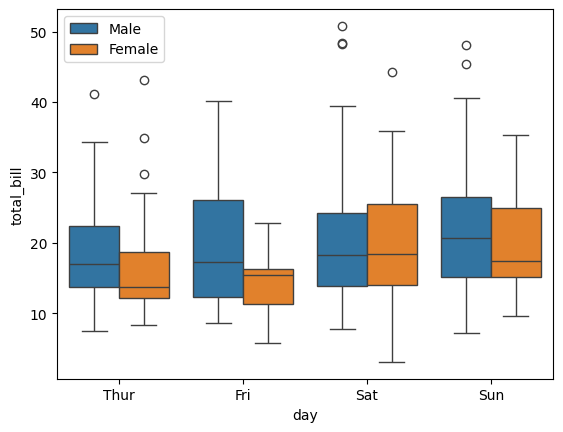

In [66]:
sns.boxplot(x='day', y='total_bill', data=tips_df, hue='sex')

plt.legend(loc=0)

## Voilin Plot

<Axes: xlabel='day', ylabel='total_bill'>

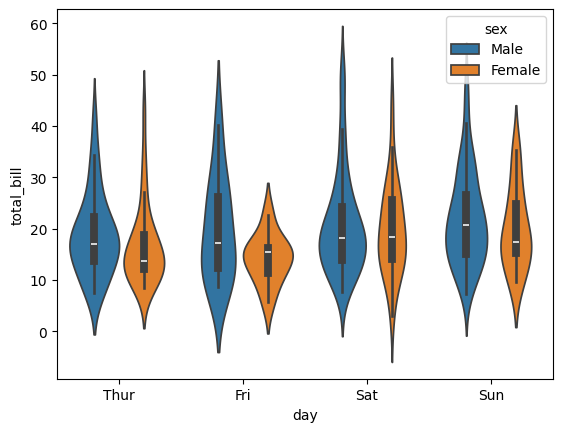

In [83]:
sns.violinplot(x='day', y='total_bill', data=tips_df, hue='sex')

<Axes: xlabel='day', ylabel='total_bill'>

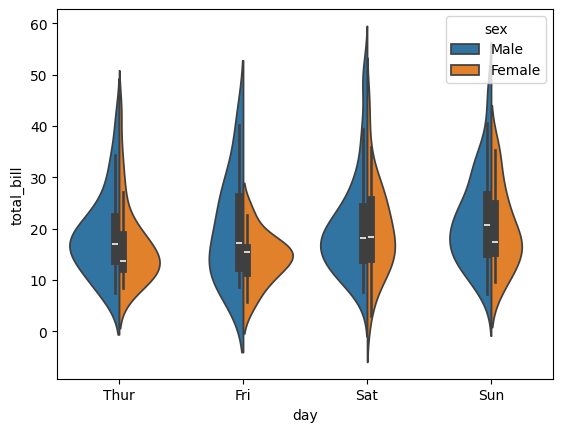

In [84]:
sns.violinplot(x='day', y='total_bill', data=tips_df, hue='sex', split=True)

## Strip Plot

<Figure size 800x600 with 0 Axes>

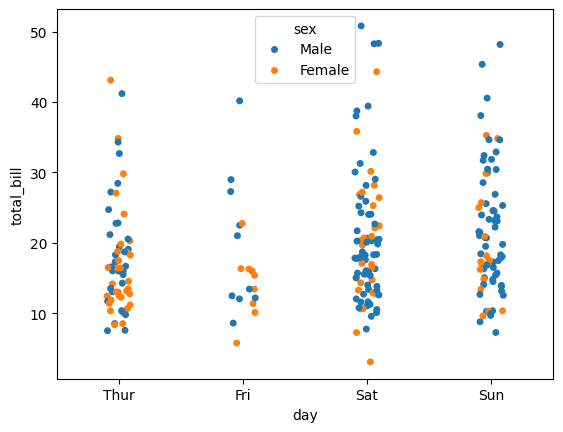

<Figure size 800x600 with 0 Axes>

In [93]:
sns.stripplot(x='day', y='total_bill', data=tips_df, jitter=True, hue='sex')
plt.figure(figsize=(8,6))

Now we add `dodge` and see the difference. It will help to seperate the data os males and females

<Figure size 800x600 with 0 Axes>

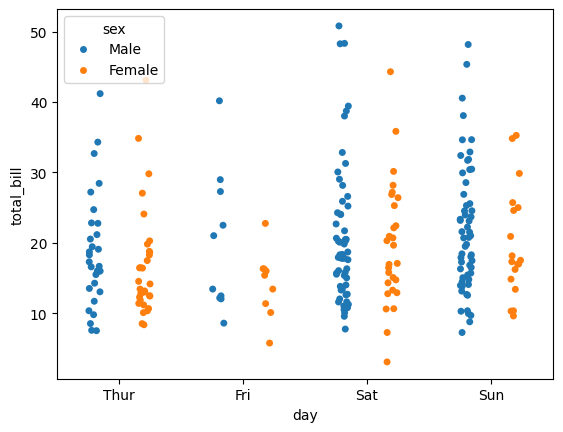

<Figure size 800x600 with 0 Axes>

In [94]:
sns.stripplot(x='day', y='total_bill', data=tips_df, jitter=True, hue='sex', dodge=True)
plt.figure(figsize=(8,6))

## Swarm Plot

<Axes: xlabel='day', ylabel='total_bill'>

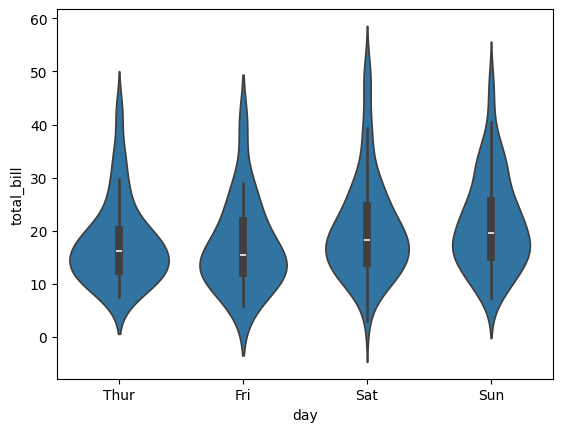

In [95]:
sns.violinplot(x='day', y='total_bill', data= tips_df)

<Axes: xlabel='day', ylabel='total_bill'>

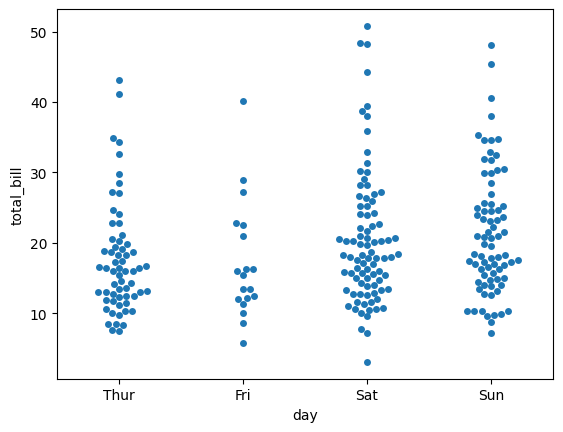

In [97]:
sns.swarmplot(x='day', y='total_bill', data= tips_df)

And now let's combine them together

<Axes: xlabel='day', ylabel='total_bill'>

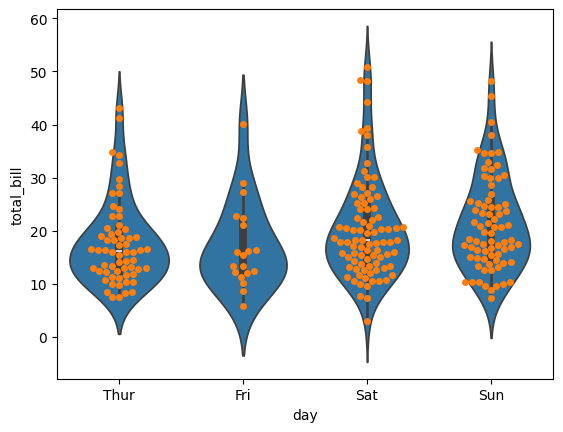

In [101]:
sns.violinplot(x='day', y='total_bill', data= tips_df)
sns.swarmplot(x='day', y='total_bill', data= tips_df)

## Palettes

<Axes: xlabel='day', ylabel='total_bill'>

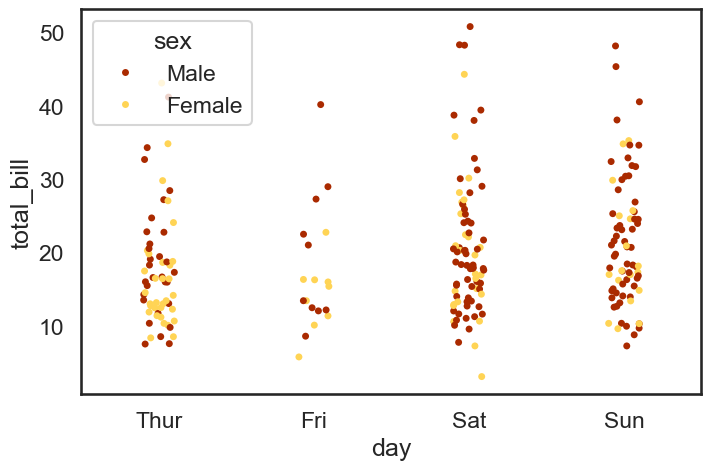

In [112]:
plt.figure(figsize=(8,5))
sns.set_style('white')
sns.set_context('talk')  # we can change context to 'paper' or 'poster'
sns.stripplot(x='day', y='total_bill', data=tips_df, hue='sex', palette='afmhot')

## Matrix Plot

### HeatMap

In [123]:

crash_mx = crash_df.drop(columns='abbrev')
crash_mx = crash_mx.corr()

<Axes: >

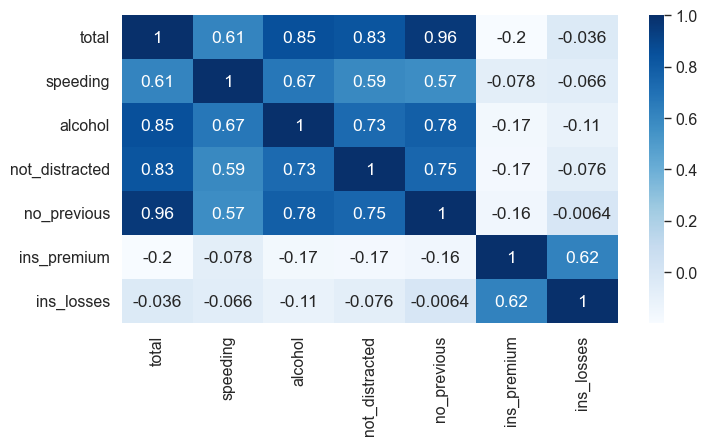

In [133]:
plt.figure(figsize=(8,4))
sns.set_context('paper', font_scale=1.3)

sns.heatmap(crash_mx, annot=True, cmap='Blues')

In [22]:
flights = sns.load_dataset('flights')

In [23]:
fl_pivot = flights.pivot_table(index='month', columns='year', values='passengers')
fl_pivot

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<Axes: xlabel='year', ylabel='month'>

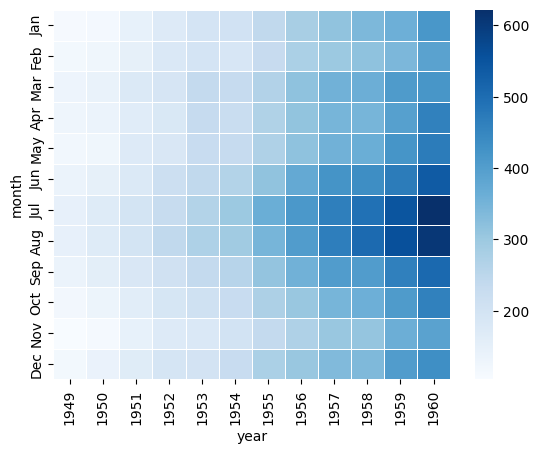

In [24]:
sns.heatmap(fl_pivot, cmap='Blues', linecolor='white', linewidth= 0.5)

## Cluster Map

In [18]:
iris = sns.load_dataset('iris')
iris.head(9)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa


In [158]:
pip install spicy

     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ---------------------------------------- 60.4/60.4 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/44.1 MB ? eta -:--:--
   ---------------------------------------- 0.4/44.1 MB 11.6 MB/s eta 0:00:04
   - -------------------------------------- 1.2/44.1 MB 15.2 MB/s eta 0:00:03
   - -------------------------------------- 1.6/44.1 MB 11.1 MB/s eta 0:00:04
   - -------------------------------------- 1.9/44.1 MB 10.1 MB/s eta 0:00:05
   - -------------------------------------- 2.1/44.1 MB 9.4 MB/s eta 0:00:05
   -- ------------------------------------- 2.2/44.1 MB 7.9 MB/s eta 0:00:06
   -- ------------------------------------- 2.4/44.1 MB 7.2 MB/s eta 0:00:06
   -- ------------------------------------- 2.5/44.1 MB 7.0 MB/s eta 0:00:06
   -- ------------------------------------- 2.7/44.1 MB 6.6 MB/s eta 0:00:07
   -- ------------------------------------- 2.9/44.1 MB 6.1 MB/s eta 0:00:07
   -

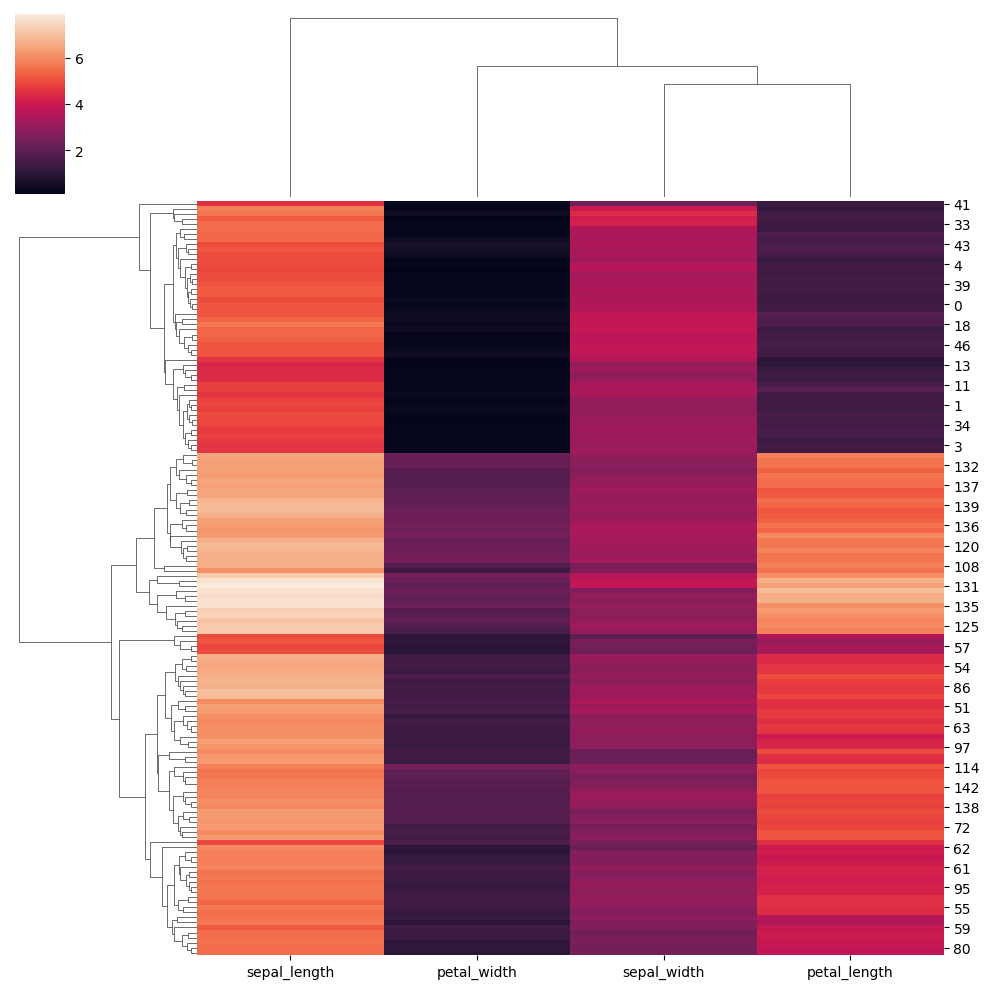

In [19]:
species = iris.pop('species')
sns.clustermap(iris)

## Pair Grid

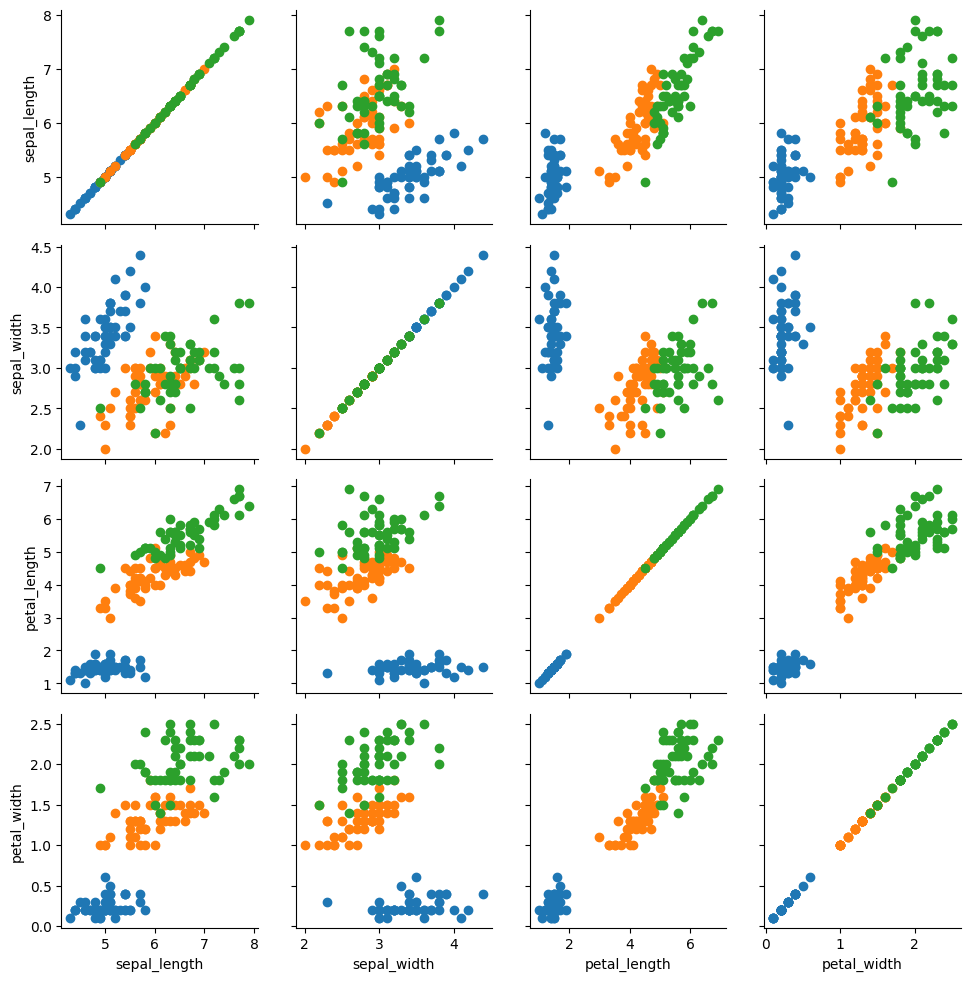

In [28]:
iris = sns.load_dataset('iris')
iris_g = sns.PairGrid(iris, hue='species')
iris_g.map(plt.scatter)

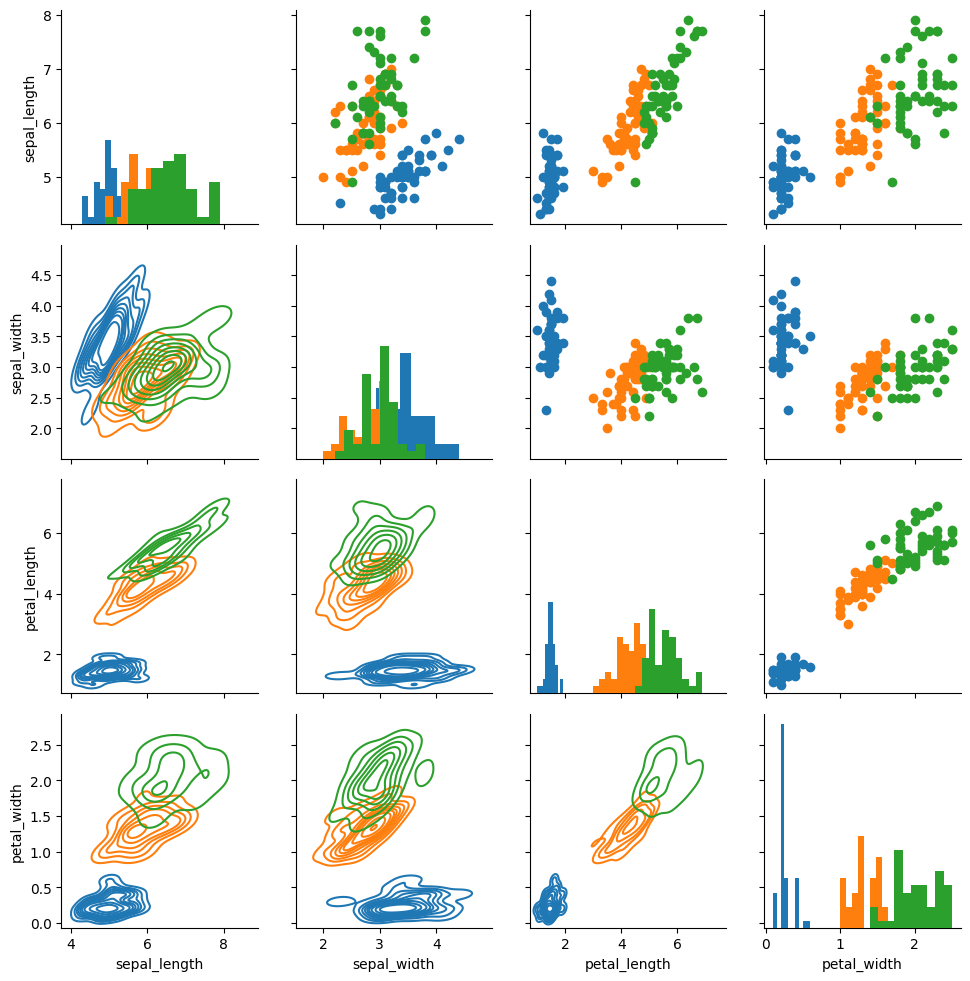

In [31]:
iris = sns.load_dataset('iris')
iris_g = sns.PairGrid(iris, hue='species')
iris_g.map_diag(plt.hist)
# iris_g.map_offdiag(plt.scatter)
iris_g.map_upper(plt.scatter)
iris_g.map_lower(sns.kdeplot)

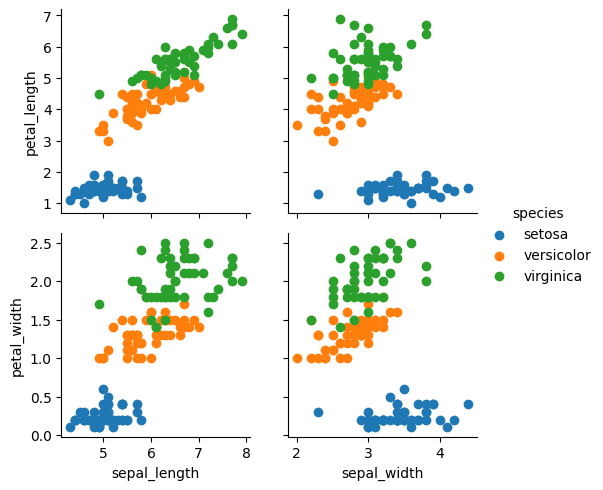

In [33]:
iris = sns.load_dataset('iris')
iris_g = sns.PairGrid(iris, hue='species',
                      x_vars=["sepal_length", "sepal_width"],
                      y_vars=["petal_length", "petal_width"])
iris_g.map(plt.scatter)
iris_g.add_legend()

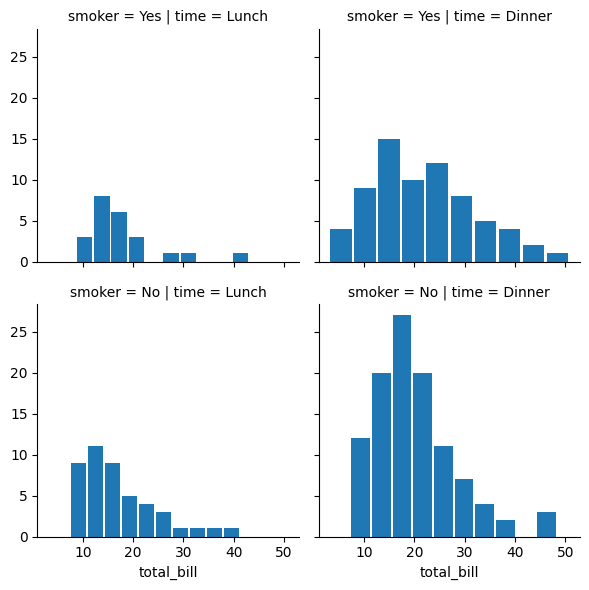

In [41]:
tips_fg = sns.FacetGrid(tips_df, col='time', row='smoker')
tips_fg.map(plt.hist, 'total_bill', bins=10, rwidth= 0.9)

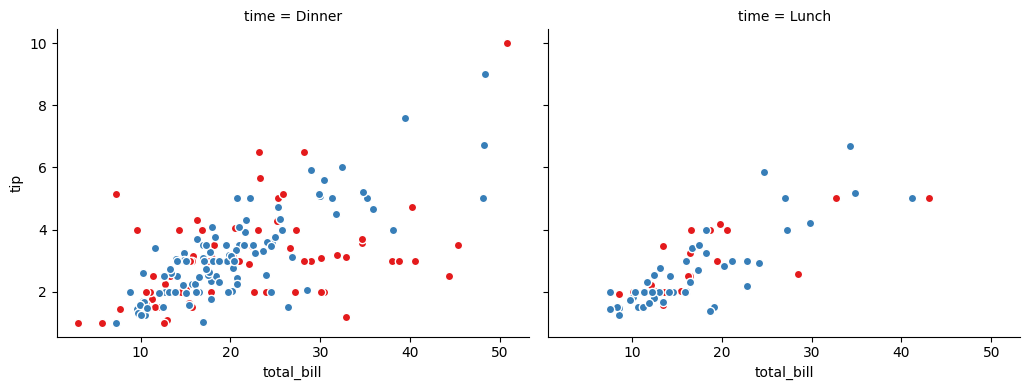

In [46]:
tips_fg = sns.FacetGrid(tips_df, col='time', hue='smoker', height=4, aspect=1.3, 
                        col_order=["Dinner", "Lunch"],palette='Set1' )
tips_fg.map(plt.scatter, 'total_bill', 'tip', edgecolor='w' )

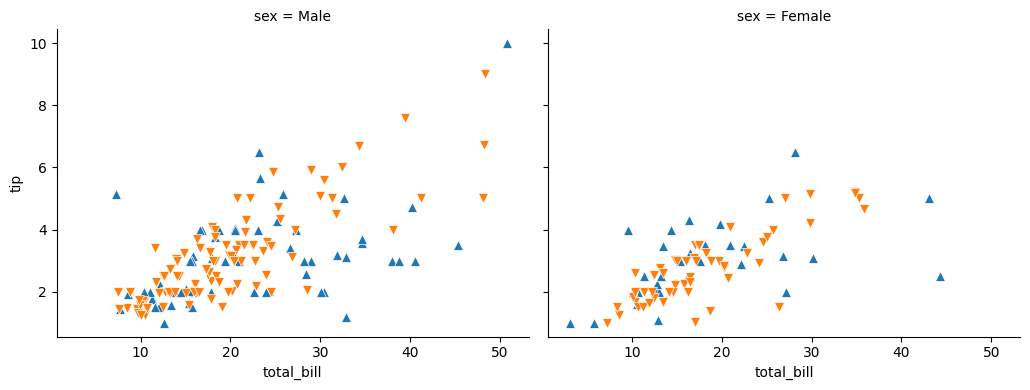

In [48]:
kws = dict(s=50, linewidth=0.5, edgecolor='w')
tips_fg = sns.FacetGrid(tips_df, col='sex', hue='smoker', height=4, aspect=1.3,
                        hue_order=["Yes", "No"],
                        hue_kws=dict(marker=['^','v']))
tips_fg.map(plt.scatter, 'total_bill', 'tip', **kws)

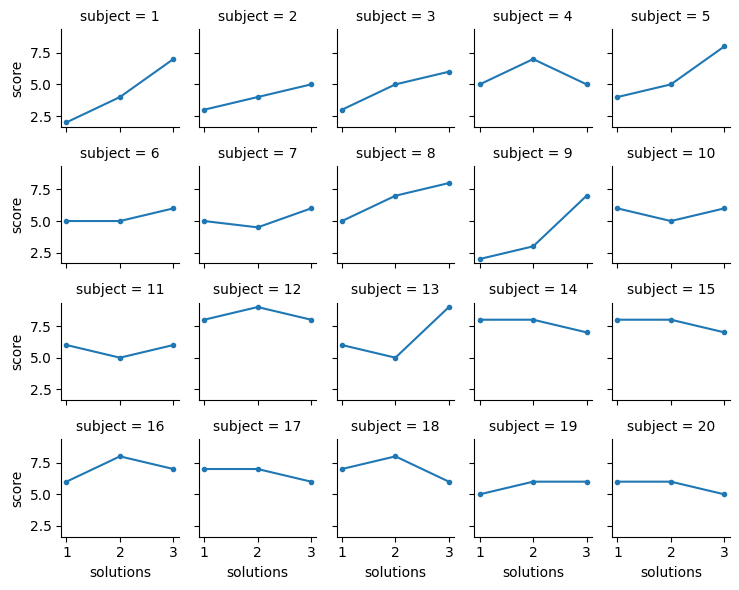

In [52]:
att_df = sns.load_dataset('attention')
att_df = sns.FacetGrid(att_df, col='subject', col_wrap=5, height=1.5)
att_df.map(plt.plot, "solutions", "score", marker=('.'))

## Regression Plot

In [54]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Figure size 800x600 with 0 Axes>

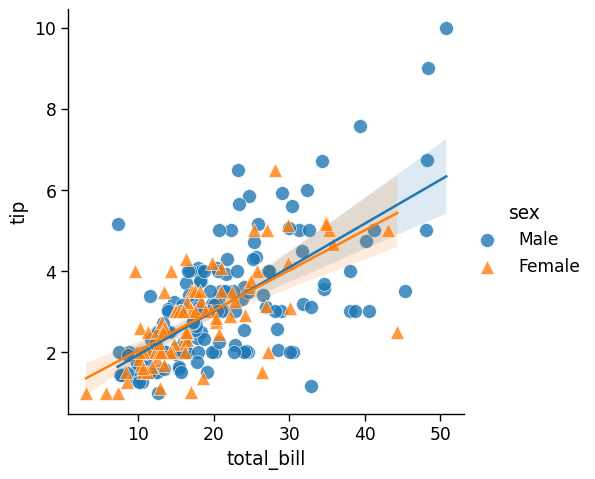

In [58]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)
sns.lmplot(x='total_bill', y='tip', hue='sex', data=tips_df, markers=['o','^'], 
           scatter_kws={'s': 100, 'linewidths': 0.5, 'edgecolor':'w'})

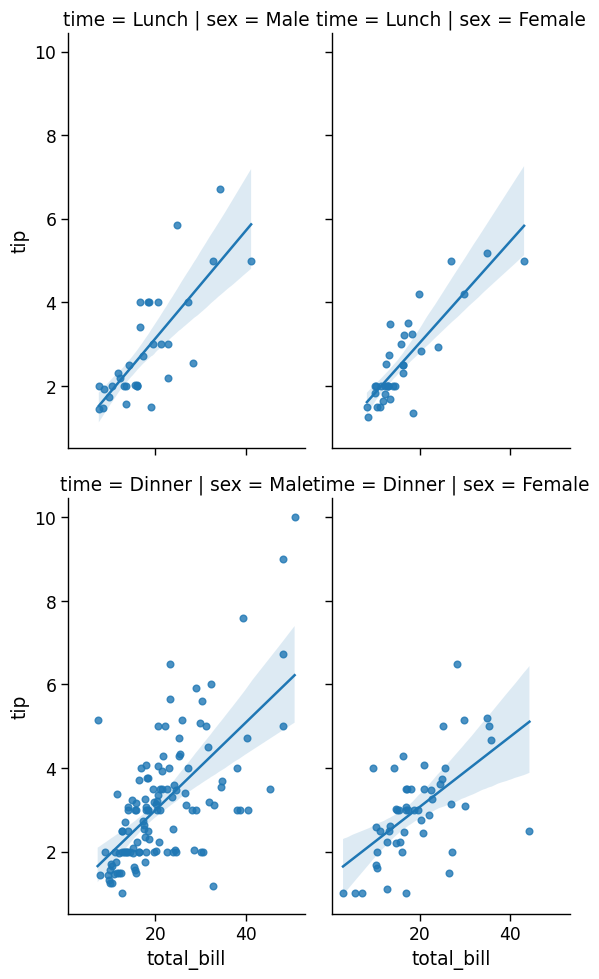

In [61]:
sns.set_context('paper', font_scale=1.4)
sns.lmplot(x='total_bill', y='tip', col='sex', row='time', data=tips_df, 
           height=5, aspect=0.6)